# ライブラリのインポート

In [78]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",100)
import matplotlib.pyplot as plt
%matplotlib inline

# データのダウンロード

In [79]:
#trainデータとtestデータのダウンロード
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# データの観察

In [80]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [82]:
#データの大きさの確認
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [83]:
#データの種類の確認
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


object型の変数はこのままでは分析にかけることができないので後にmappingする必要があります。

## 目的関数の観察


/Users/matsunaganaoki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


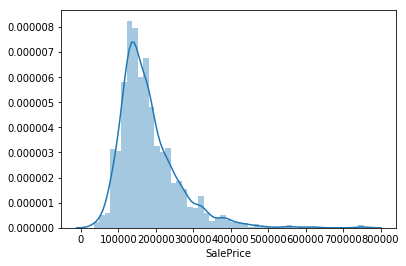

In [84]:
#目的関数の観察
import seaborn as sns
y_data=train["SalePrice"]
ax=sns.distplot(y_data)
plt.show()

分析しやすいように対数をとって正規分布に変換する

/Users/matsunaganaoki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


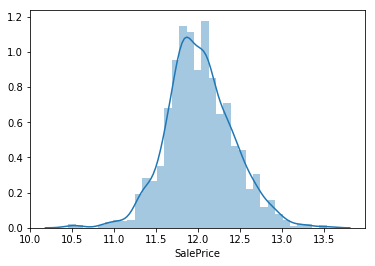

In [85]:
#正規分布に変換
y_data=np.log(y_data)
ax=sns.distplot(y_data)
plt.show()

In [141]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 欠損値の補完

In [86]:
#trainデータの欠損値の確認
print(train.isnull().sum()[train.isnull().sum()>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [87]:
#testデータの欠損値の確認
print(test.isnull().sum()[test.isnull().sum()>0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [88]:
#欠損値の多い項目の削除
#Alleyの削除
train=train.drop("Alley",axis=1)
test=test.drop("Alley",axis=1)
#PoolQCの削除
train=train.drop("PoolQC",axis=1)
test=test.drop("PoolQC",axis=1)
#Fenceの削除
train=train.drop("Fence",axis=1)
test=test.drop("Fence",axis=1)
#MiscFeatureの削除
train=train.drop("MiscFeature",axis=1)
test=test.drop("MiscFeature",axis=1)
#FireplaceQuの削除
train=train.drop("FireplaceQu",axis=1)
test=test.drop("FireplaceQu",axis=1)
#種類の少ない項目の削除
#Utilitiesの削除
train=train.drop("Utilities",axis=1)
test=test.drop("Utilities",axis=1)

In [89]:
#欠損値の補完
#BasementとGarageの欠損値は存在しない場合が考えられるためNoneでReplace
train["BsmtQual"].fillna('None', inplace=True)
test["BsmtQual"].fillna('None', inplace=True)
train["BsmtCond"].fillna('None', inplace=True)
test["BsmtCond"].fillna('None', inplace=True)
train["BsmtExposure"].fillna('None', inplace=True)
test["BsmtExposure"].fillna('None', inplace=True)
train["BsmtFinType1"].fillna('None', inplace=True)
test["BsmtFinType1"].fillna('None', inplace=True)
train["BsmtFinSF1"].fillna('None', inplace=True)
test["BsmtFinSF1"].fillna('None', inplace=True)
train["BsmtFinType2"].fillna('None', inplace=True)
test["BsmtFinType2"].fillna('None', inplace=True)
train["BsmtFinSF2"].fillna('None', inplace=True)
test["BsmtFinSF2"].fillna('None', inplace=True)
train["BsmtUnfSF"].fillna('None', inplace=True)
test["BsmtUnfSF"].fillna('None', inplace=True)
train["TotalBsmtSF"].fillna('None', inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean(), inplace=True)
train["GarageType"].fillna('None', inplace=True)
test["GarageType"].fillna('None', inplace=True)
#GarageYrBltの欠損値を平均値補完
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean(), inplace=True)
train["GarageFinish"].fillna('None', inplace=True)
test["GarageFinish"].fillna('None', inplace=True)
train["GarageCars"].fillna('None', inplace=True)
test["GarageCars"].fillna(test["GarageCars"].mean(), inplace=True)
train["GarageArea"].fillna('None', inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mean(), inplace=True)
train["GarageQual"].fillna('None', inplace=True)
test["GarageQual"].fillna('None', inplace=True)
train["GarageCond"].fillna('None', inplace=True)
test["GarageCond"].fillna('None', inplace=True)
train["MasVnrType"].fillna("None",inplace=True)
test["MasVnrType"].fillna("None",inplace=True)
train["MasVnrArea"].fillna(0,inplace=True)
test["MasVnrArea"].fillna(0,inplace=True)
test["Exterior1st"].fillna('None',inplace=True)
test["Exterior2nd"].fillna('None',inplace=True)
test["BsmtFullBath"].fillna('None',inplace=True)
test["BsmtHalfBath"].fillna('None',inplace=True)
test["KitchenQual"].fillna('None',inplace=True)
test["Functional"].fillna('None',inplace=True)
test["SaleType"].fillna('None',inplace=True)
#Electricalは最頻要素で補完
train["Electrical"].fillna('SBrkr',inplace=True)
test["MSZoning"].fillna('RL',inplace=True)
#Neighborhoodでグループし平均をとって補完
f = lambda x: x.fillna(x.mean())
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(f)
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(f)

In [90]:
#欠損値の確認
print(train.isnull().any().head())
print("\n")
print(test.isnull().any().head())

Id             False
MSSubClass     False
MSZoning       False
LotFrontage    False
LotArea        False
dtype: bool


Id             False
MSSubClass     False
MSZoning       False
LotFrontage    False
LotArea        False
dtype: bool


# データの前処理

## FeatureEngineering

統合するとわかりやすくなるデータなどを統合して新しいcolumnsを作成する

In [91]:
##FeatureEngineering
#総床面積を算出する
train["TotalFlrSF"]=train["1stFlrSF"]+train["2ndFlrSF"]
test["TotalFlrSF"]=test["1stFlrSF"]+test["2ndFlrSF"]
#総ベランダ面積を算出する
train["TotalHousePorchSF"]=train["EnclosedPorch"]+train["OpenPorchSF"]+train["WoodDeckSF"]+train["3SsnPorch"]+train["ScreenPorch"]
test["TotalHousePorchSF"]=test["EnclosedPorch"]+test["OpenPorchSF"]+test["WoodDeckSF"]+test["3SsnPorch"]+test["ScreenPorch"]                               
#建設年から築年数への変換
train["Age"]=2018-train["YearBuilt"]
test["Age"]=2018-test["YearBuilt"]
#リフォームされた年から、されてからの期間への変換
train["YrSinceRemod"]=2018-train["YearRemodAdd"]
test["YrSinceRemod"]=2018-test["YearRemodAdd"]                             
#売年から売れてからの年への変換
train["YrSinceSold"]= 2018-train["YrSold"]
test["YrSinceSold"]= 2018-test["YrSold"]
#garageに関しても同じ処理を施す
train["GarageSinceYrBlt"]=2018-train["GarageYrBlt"]
test["GarageSinceYrBlt"]=2018-test["GarageYrBlt"]


In [92]:
#階別床面積の項目の削除
train=train.drop("1stFlrSF",axis=1)
test=test.drop("1stFlrSF",axis=1)
train=train.drop("2ndFlrSF",axis=1)
test=test.drop("2ndFlrSF",axis=1)
#建設年の項目の削除
train=train.drop("YearBuilt",axis=1)
test=test.drop("YearBuilt",axis=1)
#GarageYrBltの項目の削除
train=train.drop("GarageYrBlt",axis=1)
test=test.drop("GarageYrBlt",axis=1)

### object型のデータをmapping

解析にかけるためにLabelEncoderにかける

In [93]:
#RabelEncoderでmapping
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

(参考:https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb)

## 各項目の重要度を算出する

In [94]:
X_data=train.drop(["Id","SalePrice"],axis=1)

In [95]:
#各項目の重要度を算出する
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=0,n_estimators=100)
rfr.fit(X_data,y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

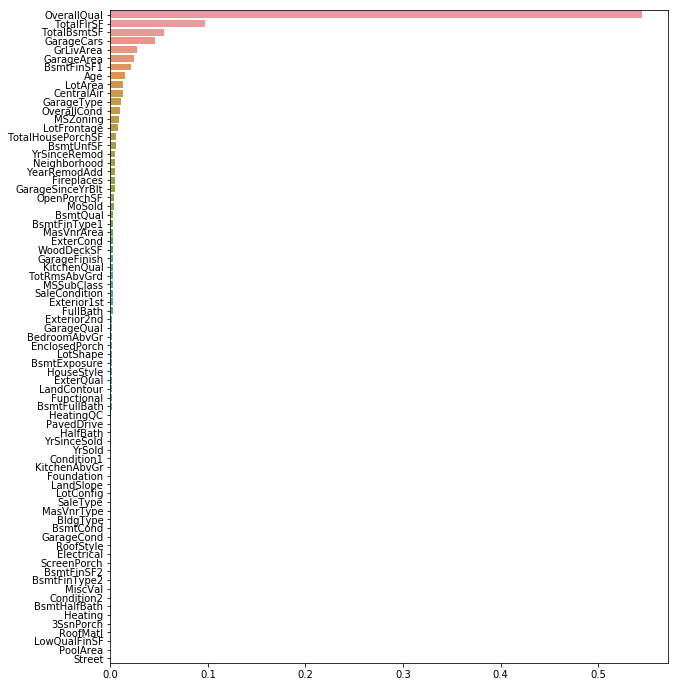

In [96]:
#降順に並べるために、argsort関数を用いてindexを出力する
ranking=np.argsort(-rfr.feature_importances_)
ax=plt.subplots(figsize=(10,12))

#重要度順に棒グラフで可視化
sns.barplot(x=rfr.feature_importances_[ranking],y=X_data.columns[ranking])
plt.show()

(参考:https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb)

In [132]:
#重要度の高いcolumnsを上から15個抽出
X_pickup=X_data.loc[:,['OverallQual','TotalFlrSF','TotalBsmtSF','GarageCars','GrLivArea','GarageArea','BsmtFinSF1','Age','LotArea','CentralAir','GarageType', 'OverallCond', 'MSZoning', 'LotFrontage']]

In [130]:
#important_columnsとy_dataの結合
data_2=pd.concat([X_pickup,y_data],axis=1)

## 相関関係を調べる

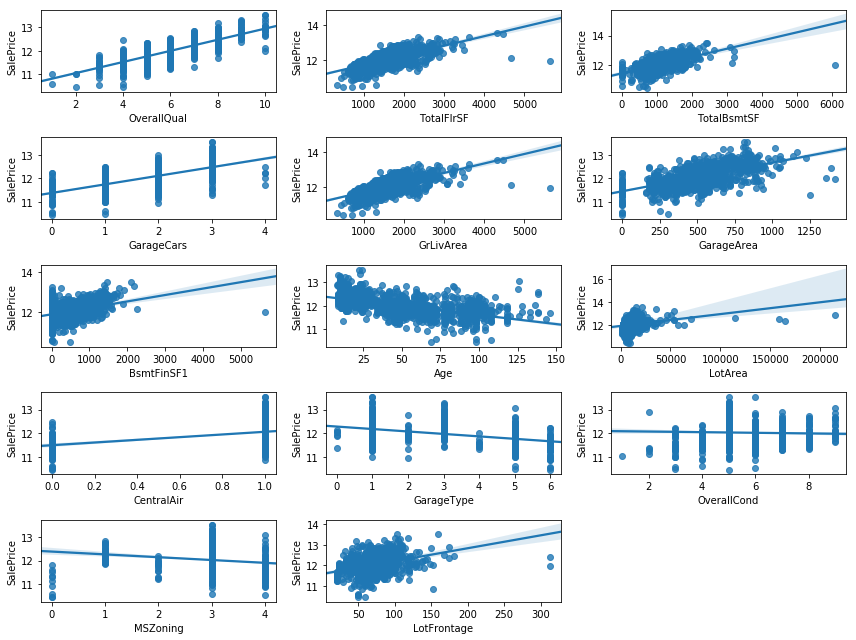

In [100]:
#important_columnsとSalePriceとの相関をみる
import seaborn as sns
fig=plt.figure(figsize=(12,9))
for i in np.arange(14):
    ax=fig.add_subplot(5,3,i+1)
    sns.regplot(x=X_pickup.iloc[:,i],y=y_data)
    
plt.tight_layout()


plt.show()

In [101]:
#相関係数も確認
data_2.corr()

,OverallQual,TotalFlrSF,TotalBsmtSF,GarageCars,GrLivArea,GarageArea,BsmtFinSF1,Age,LotArea,CentralAir,GarageType,OverallCond,MSZoning,LotFrontage,SalePrice
OverallQual,1.000000,0.600758,0.537808,0.600671,0.593007,0.562022,0.239666,-0.572323,0.105806,0.272038,-0.426428,-0.091932,-0.160099,0.236282,0.817184
TotalFlrSF,0.600758,1.000000,0.461738,0.479932,0.995718,0.479189,0.215913,-0.217805,0.264850,0.099120,-0.250859,-0.082724,-0.084374,0.386336,0.710274
TotalBsmtSF,0.537808,0.461738,1.000000,0.434585,0.454868,0.486665,0.522396,-0.391452,0.260833,0.207958,-0.394368,-0.171098,-0.087834,0.370780,0.612134
GarageCars,0.600671,0.479932,0.434585,1.000000,0.467247,0.882475,0.224054,-0.537850,0.154871,0.233726,-0.445903,-0.185758,-0.157042,0.279995,0.680625
GrLivArea,0.593007,0.995718,0.454868,0.467247,1.000000,0.468997,0.208171,-0.199010,0.263116,0.093666,-0.233985,-0.079686,-0.082615,0.385982,0.700927
GarageArea,0.562022,0.479189,0.486665,0.882475,0.468997,1.000000,0.296970,-0.478954,0.180403,0.230741,-0.411341,-0.151521,-0.189250,0.332306,0.650888
BsmtFinSF1,0.239666,0.215913,0.522396,0.224054,0.208171,0.296970,1.000000,-0.249503,0.214103,0.166468,-0.277685,-0.046231,-0.049128,0.227212,0.372023
Age,-0.572323,-0.217805,-0.391452,-0.537850,-0.199010,-0.478954,-0.249503,1.000000,-0.014228,-0.381831,0.540352,0.375983,0.308908,-0.127706,-0.586570
LotArea,0.105806,0.264850,0.260833,0.154871,0.263116,0.180403,0.214103,-0.014228,1.000000,0.049755,-0.150162,-0.005636,-0.034452,0.336997,0.257320
CentralAir,0.272038,0.099120,0.207958,0.233726,0.093666,0.230741,0.166468,-0.381831,0.049755,1.000000,-0.321686,0.118969,-0.049523,0.081077,0.351600


## 外れ値の削除


上の相関関係のグラフを見てデータ分析に影響がありそうな外れ値を削除する

In [102]:
data_2=data_2.drop(data_2[(data_2["TotalFlrSF"]>4000)&(data_2["SalePrice"]<13)].index)
data_2=data_2.drop(data_2[(data_2["TotalBsmtSF"]>5000)&(data_2["SalePrice"]<14)].index)
data_2=data_2.drop(data_2[(data_2["GrLivArea"]>4000)&(data_2["SalePrice"]<13)].index)
data_2=data_2.drop(data_2[(data_2["GarageArea"]>1200)&(data_2["SalePrice"]<12)].index)                          
data_2=data_2.drop(data_2[(data_2["Age"]>120)&(data_2["SalePrice"]>12.5)].index)

多重共線性を加味して、重要度の高いものでも、
"GrLivArea"("TotalFlrSF"との相関が0.99以上)と、
"GarageArea"("GarageCars"との相関が0.88)
を除いた上で、"SalePrice"との相関関係の大きいものを説明変数として抽出する。


In [104]:
#特に重要な項目を抽出
X_1_pickup=data_2.loc[:,["OverallQual","TotalFlrSF","TotalBsmtSF","GarageCars","Age"]]
y_1_data=data_2.loc[:,["SalePrice"]]

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_1_pickup,y_1_data,test_size=0.3,random_state=0)

## データをアルゴリズムにかける

### 1)randomforestにかける

GridSearchを用いて最適なパラメータを求め、RandomForestRegressorで回帰分析を行う

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param_grid={"n_estimators":[250,300,350],"max_depth":[5,10,15]}
rf_gs=GridSearchCV(rf,param_grid)

In [137]:
rf_gs.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 300, 350], 'max_depth': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print('adjusted R^2')
print('train score: %3f' % adjusted(rf_gs.score(X_train, y_train), len(y_train), 2))
print('test score : %3f' % adjusted(rf_gs.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train score: 0.967052
test score : 0.826359


かなり過学習しているため、今回は分析のアルゴリズムからは除外する

## 2) XGboostにかける

こちらもGridSearchで最適なパラメータを求める

In [139]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()
xgb_gs = GridSearchCV(xgb_model,
                   {'max_depth': [1,2,3],
                    'n_estimators': [80,90,100]})

xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3], 'n_estimators': [80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
#調整済み決定係数を算出する
print('adjusted R^2')
print('train score: %3f' % adjusted(xgb_gs.score(X_train, y_train), len(y_train), 2))
print('test score : %3f' % adjusted(xgb_gs.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train score: 0.883398
test score : 0.843075


## 3)重回帰分析にかける

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
print('adjusted R^2')
print('train score: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test score : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train score: 0.850568
test score : 0.840148


# 提出用ファイルに変換する 

testデータで精度が出ている重回帰分析とXGBoostでスタッキングをし、提出用ファイルの予測値を出力する

In [115]:
ans_data=test.loc[:,["OverallQual","TotalFlrSF","TotalBsmtSF","GarageArea","Age"]]
y_pred=np.exp(lr.predict(ans_data).reshape(-1))
y_2_pred=np.exp(reg_xgb.predict(ans_data).reshape(-1))
y_stack=(y_pred)*(1/2)+(y_2_pred)*(1/2)

#提出用のファイルに変換
submit_file=pd.DataFrame({
    "id":test["Id"],
    "SalePrice": y_stack,
    })
submit_file.to_csv('submit.csv',index=False)